In [1]:
using PrecisionCarriers
using Random
using Pkg
Pkg.develop(url="/home/antonr/repos/QEDbase.jl")
Pkg.develop(url="/home/antonr/repos/QEDcore.jl")
Pkg.develop(url="/home/antonr/repos/QEDprocesses.jl")
Pkg.develop(url="/home/antonr/repos/QEDFeynmanDiagrams.jl")
using QEDbase, QEDcore, QEDprocesses, QEDFeynmanDiagrams

   Resolving package versions...
  No Changes to `~/repos/PrecisionCarriers.jl/Project.toml`
  No Changes to `~/repos/PrecisionCarriers.jl/Manifest.toml`
   Resolving package versions...
  No Changes to `~/repos/PrecisionCarriers.jl/Project.toml`
  No Changes to `~/repos/PrecisionCarriers.jl/Manifest.toml`
   Resolving package versions...
  No Changes to `~/repos/PrecisionCarriers.jl/Project.toml`
  No Changes to `~/repos/PrecisionCarriers.jl/Manifest.toml`
   Resolving package versions...
  No Changes to `~/repos/PrecisionCarriers.jl/Project.toml`
  No Changes to `~/repos/PrecisionCarriers.jl/Manifest.toml`
┌ Warning: Circular dependency detected.
│ Precompilation will be skipped for dependencies in this cycle:
│  ┌ QEDprocesses
│  └─ PrecisionCarriers
│ Precompilation will also be skipped for the following, which depend on the above cycle:
│   PrecisionCarriers → RandomExt
└ @ Base.Precompilation precompilation.jl:651
[ Info: Precompiling QEDbase [10e22c08-3ccb-4172-bfcf-7d7aa3d04d93

In [2]:
RNG = MersenneTwister(0)

FLOAT_T = PrecisionCarrier{Float64}

PROC = Compton()
MODEL = PerturbativeQED()
PSL = ComptonSphericalLayout(ComptonRestSystem(Energy(2)))

OMEGA = 1.0e3

N_PHIS = 10
N_COS = 2000

PHIS_LIMS = (0.0, 2*pi)
PHIS = (PHIS_LIMS[2] - PHIS_LIMS[1]) .* [(0.0:1.0/N_PHIS:1.0)..., ] .+ PHIS_LIMS[1]

COS_THETAS_LIMS = (0.999, 1.0)
COS_THETAS = (COS_THETAS_LIMS[2] - COS_THETAS_LIMS[1]) .* [(0.0:1.0/N_COS:1.0)..., ] .+ COS_THETAS_LIMS[1]

2001-element Vector{Float64}:
 0.999
 0.9990005
 0.999001
 0.9990015
 0.999002
 0.9990025
 0.999003
 0.9990035
 0.999004
 0.9990045
 0.999005
 0.9990055
 0.999006
 ⋮
 0.9999945
 0.999995
 0.9999955
 0.999996
 0.9999965
 0.999997
 0.9999975
 0.999998
 0.9999985
 0.999999
 0.9999995
 1.0

In [3]:
@bench_epsilons unsafe_differential_cross_section(PhaseSpacePoint($PROC, $MODEL, $PSL, (omega,), (cth, phi))) ranges = begin
    omega = (1.0, 1000.0)
    phi = (0.0, 3.0)
    cth = (0.999, 1.0)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:18


  samples:  9261
  minimum:  0 ε
  median:   467.0 ε
  mean:     1618.444 ε
  maximum:  78766 ε

                              ▁▂█▆▂▄ ▁                      
▆▁▁▁▄▁▃▂▂▂▂▂▂▂▂▂▂▄▄▅▄▄▄▄▆▆█▆██████████▅▇▅▅▄▃▃▃▂▂▄▁▃▁▁▃▁▃▁▃▁▂
^ 1 ε                  log scale                   78766 ε ^

  largest imprecisions:
unsafe_differential_cross_section(PhaseSpacePoint(PROC, MODEL, PSL, (precify(900.1), ), (precify(1.0), precify(0.0)))) -> <ε=78766>
unsafe_differential_cross_section(PhaseSpacePoint(PROC, MODEL, PSL, (precify(900.1), ), (precify(1.0), precify(0.15)))) -> <ε=78766>
unsafe_differential_cross_section(PhaseSpacePoint(PROC, MODEL, PSL, (precify(900.1), ), (precify(1.0), precify(0.3)))) -> <ε=78766>
unsafe_differential_cross_section(PhaseSpacePoint(PROC, MODEL, PSL, (precify(900.1), ), (precify(1.0), precify(0.45)))) -> <ε=78766>
unsafe_differential_cross_section(PhaseSpacePoint(PROC, MODEL, PSL, (precify(900.1), ), (precify(1.0), precify(0.6)))) -> <ε=78766>


In [5]:
coords = [Iterators.product(COS_THETAS, PHIS)..., ]
coords = [Iterators.zip(getindex.(coords, 1), getindex.(coords, 2))...,]
moms = (QEDbase._build_momenta.(PROC, MODEL, PSL, Ref((precify(FLOAT_T, OMEGA), )), precify(FLOAT_T, coords)))
moms = reshape(moms, (length(COS_THETAS), length(PHIS)))

max_eps = 0
for single_moms in moms
    for in_out_moms in single_moms
        for mom in in_out_moms
            epsi = maximum(epsilons.(mom))
            if epsi > max_eps
                println("new max epsilons $epsilons from $mom")
                max_eps = epsi
            end
        end
    end
end
println("Maximum epsilon observed: $max_eps")

out_matrix = fill(zero(FLOAT_T), (length(COS_THETAS), length(PHIS)))

new max epsilons epsilons from PrecisionCarrier{Float64}[501.0 <ε=2>, -22.35508890610801 <ε=30>, 0.0 <ε=0>, 500.5 <ε=2>]
new max epsilons epsilons from PrecisionCarrier{Float64}[500.8749687421885 <ε=68>, -22.355091002946445 <ε=103>, 0.0 <ε=0>, 500.3748437109307 <ε=68>]
new max epsilons epsilons from PrecisionCarrier{Float64}[500.74987493747466 <ε=116>, -22.35509170049169 <ε=62>, 0.0 <ε=0>, 500.2496248124121 <ε=116>]
new max epsilons epsilons from PrecisionCarrier{Float64}[500.3742177722016 <ε=88>, -22.35508537634924 <ε=146>, 0.0 <ε=0>, 499.8735919899738 <ε=88>]
new max epsilons epsilons from PrecisionCarrier{Float64}[498.8659302033863 <ε=121>, -22.35493281152305 <ε=176>, 0.0 <ε=0>, 498.3637961335897 <ε=121>]
new max epsilons epsilons from PrecisionCarrier{Float64}[495.05514798889504 <ε=126>, -22.35364012817236 <ε=180>, 0.0 <ε=0>, 494.54920313688393 <ε=126>]
new max epsilons epsilons from PrecisionCarrier{Float64}[487.2573850500937 <ε=130>, -22.346942404367546 <ε=182>, 0.0 <ε=0>, 486.74

2001×11 Matrix{PrecisionCarrier{Float64}}:
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>  …  0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>     0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>     0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>     0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>     0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>  …  0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>     0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>     0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>     0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>     0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>  …  0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>     0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>     0.0 <ε=0>  0.0 <ε=0>  0.0 <ε=0>
 ⋮                                ⋱                        ⋮

In [6]:
adapted_moms = moms

2001×11 Matrix{Tuple{Tuple{SFourMomentum{PrecisionCarrier{Float64}}, SFourMomentum{PrecisionCarrier{Float64}}}, Tuple{SFourMomentum{PrecisionCarrier{Float64}}, SFourMomentum{PrecisionCarrier{Float64}}}}}:
 (([1.0 <ε=0>, 0.0 <ε=0>, 0.0 <ε=0>, 0.0 <ε=0>], [1000.0 <ε=0>, 0.0 <ε=0>, 0.0 <ε=0>, 1000.0 <ε=0>]), ([501.0 <ε=2>, -22.35508890610801 <ε=30>, 0.0 <ε=0>, 500.5 <ε=2>], [500.0 <ε=2>, 22.35508890610801 <ε=30>, 0.0 <ε=0>, 499.5 <ε=2>]))                                                                         …  (([1.0 <ε=0>, 0.0 <ε=0>, 0.0 <ε=0>, 0.0 <ε=0>], [1000.0 <ε=0>, 0.0 <ε=0>, 0.0 <ε=0>, 1000.0 <ε=0>]), ([501.0 <ε=2>, -22.35508890610801 <ε=30>, 5.4754176147039355e-15 <ε=30>, 500.5 <ε=2>], [500.0 <ε=2>, 22.35508890610801 <ε=30>, -5.4754176147039355e-15 <ε=30>, 499.5 <ε=2>]))
 (([1.0 <ε=0>, 0.0 <ε=0>, 0.0 <ε=0>, 0.0 <ε=0>], [1000.0 <ε=0>, 0.0 <ε=0>, 0.0 <ε=0>, 1000.0 <ε=0>]), ([500.8749687421885 <ε=68>, -22.355091002946445 <ε=103>, 0.0 <ε=0>, 500.3748437109307 <ε=68>], [500.12503125

In [7]:
using ProgressMeter
using Base.Threads

out_matrix = unsafe_differential_cross_section.(
        PhaseSpacePoint.(
            PROC,
            MODEL,
            PSL,
            Ref((precify(FLOAT_T, OMEGA), )),
            precify(FLOAT_T, coords)
        )
    )

out_matrix = reshape(out_matrix, (length(COS_THETAS), length(PHIS)))

2001×11 Matrix{PrecisionCarrier{Float64}}:
 1.6627742082712532e-5 <ε=62>     …  1.6627742082712532e-5 <ε=62>
 1.6633568527968608e-5 <ε=244>       1.6633568527968608e-5 <ε=244>
 1.6639399139522623e-5 <ε=368>       1.6639399139522623e-5 <ε=368>
 1.664523392175761e-5 <ε=164>        1.664523392175761e-5 <ε=164>
 1.6651072879056858e-5 <ε=130>       1.6651072879056858e-5 <ε=130>
 1.665691601581561e-5 <ε=371>     …  1.665691601581561e-5 <ε=371>
 1.666276333642215e-5 <ε=471>        1.666276333642215e-5 <ε=471>
 1.66686148452921e-5 <ε=92>          1.66686148452921e-5 <ε=92>
 1.6674470546826973e-5 <ε=40>        1.6674470546826973e-5 <ε=40>
 1.6680330445445315e-5 <ε=387>       1.6680330445445315e-5 <ε=387>
 1.6686194545565566e-5 <ε=243>    …  1.6686194545565566e-5 <ε=243>
 1.6692062851618782e-5 <ε=205>       1.6692062851618782e-5 <ε=205>
 1.6697935368038618e-5 <ε=163>       1.6697935368038618e-5 <ε=163>
 ⋮                                ⋱  ⋮
 5.267088950814543e-5 <ε=2524>       5.267088950814543e

maximum(epsi) = 95557


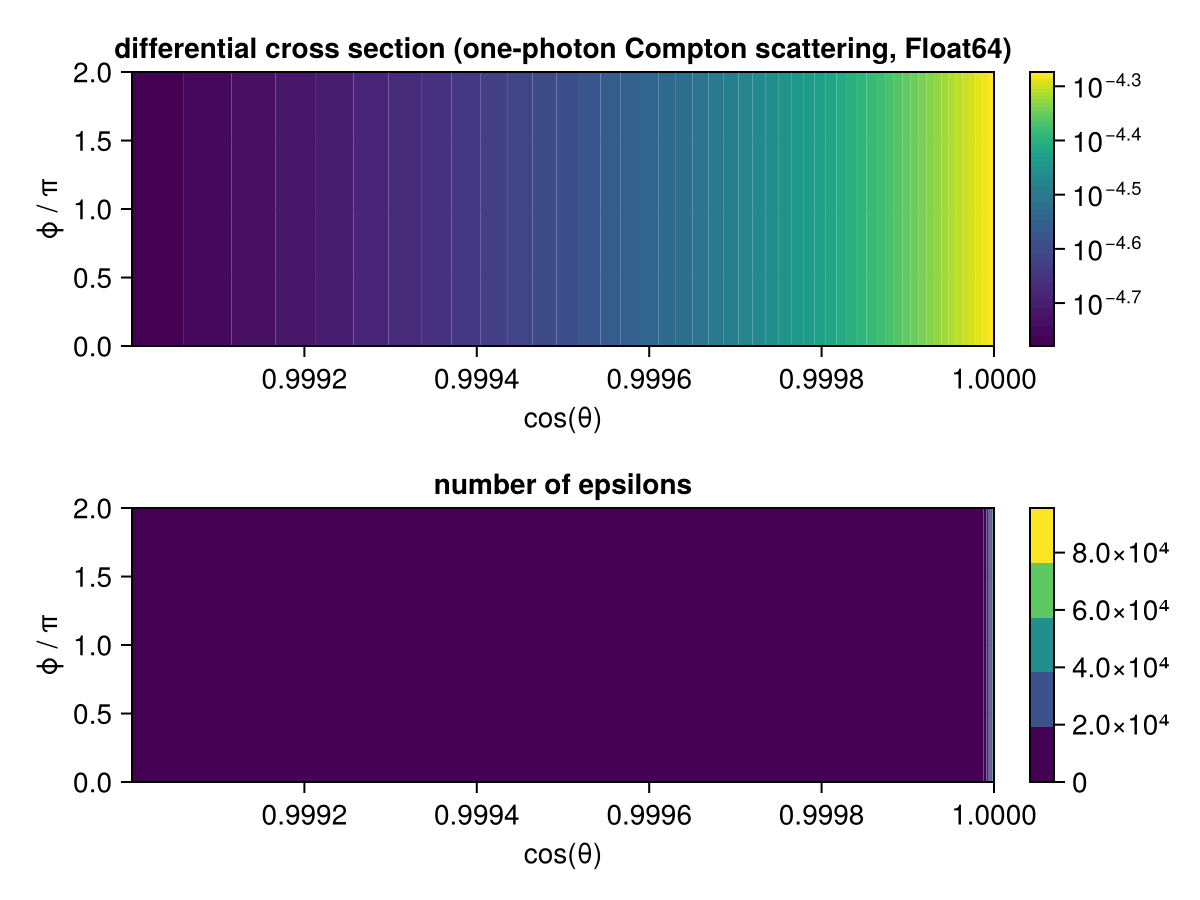

In [10]:
using CairoMakie

f = Figure(;)
ax1 = Axis(f[1, 1]; title = "differential cross section ($PROC, $(eltype(FLOAT_T)))", xlabel = "cos(θ)", ylabel = "ϕ / π")
ax2 = Axis(f[2, 1]; title = "number of epsilons", xlabel = "cos(θ)", ylabel = "ϕ / π")

vals = getfield.(out_matrix, :x)
co_vals = contourf!(ax1, COS_THETAS, PHIS ./ π, vals; levels=50, colorscale=log10)

epsi = epsilons.(out_matrix)
@show maximum(epsi)
co_epsi = contourf!(ax2, COS_THETAS, PHIS ./ π, epsi; levels=5)

Colorbar(f[1, 2], co_vals)
Colorbar(f[2, 2], co_epsi)

f

In [ ]:
save("compton_epsilons_$(eltype(FLOAT_T))_$OMEGA.pdf", f)